In [1]:
from models import *
from trainer import *
import torch
import sched
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.nn import CrossEntropyLoss,SmoothL1Loss,BCEWithLogitsLoss
import torch.optim as optim
import time
from time import sleep
from tqdm import tqdm
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  #先四周填充0，图像随机裁剪成32*32
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),  
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

works_num=4
download=True
batch_size = 128
dataset_path = '/data/'
trainset = torchvision.datasets.CIFAR10(root=dataset_path, train=True, download=download, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=works_num,pin_memory=True)
testset = torchvision.datasets.CIFAR10(root=dataset_path, train=False, download=download, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=works_num,pin_memory=True)
torch.cuda.empty_cache()

Files already downloaded and verified
Files already downloaded and verified


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
num_classes = 10

cuda


In [4]:
srn = simp_ResNet9()
srn_k7 = simp_ResNet9_k7()
srn_k333 = simp_ResNet9_k333()
srn_k33 = simp_ResNet9_k33()

losses, train_acces, test_acces = train(device=device, model=srn, train_loader=trainloader, test_loader=testloader, num_classes=num_classes, max_epoch=50)
test(device=device, net=srn, train_loader=trainloader, test_loader=testloader)
losses_k7, train_acces_k7, test_acces_k7 = train(device=device, model=srn_k7, train_loader=trainloader, test_loader=testloader, num_classes=num_classes, max_epoch=50)
test(device=device, net=srn_k7, train_loader=trainloader, test_loader=testloader)
losses_k333, train_acces_k333, test_acces_k333 = train(device=device, model=srn_k333, train_loader=trainloader, test_loader=testloader, num_classes=num_classes, max_epoch=50)
test(device=device, net=srn_k333, train_loader=trainloader, test_loader=testloader)
losses_k33, train_acces_k33, test_acces_k33 = train(device=device, model=srn_k33, train_loader=trainloader, test_loader=testloader, num_classes=num_classes, max_epoch=50)
test(device=device, net=srn_k33, train_loader=trainloader, test_loader=testloader)

torch.save(srn.state_dict(), 'srn.pth')
torch.save(srn_k7.state_dict(), 'srn_k7.pth')
torch.save(srn_k333.state_dict(), 'srn_k333.pth')
torch.save(srn_k33.state_dict(), 'srn_k33.pth')

del srn, srn_k7, srn_k333, srn_k33

50/50|██████████| [15.09s/epoch, loss:0.14, lr:0.0100, trainacc=94.87, testacc=88.14]	


Accuracy of the network on train set: 94.872 %
Accuracy of the network on test set: 88.140 %


0/50|          | [?epoch/s]	/root/miniconda3/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
50/50|██████████| [14.34s/epoch, loss:0.21, lr:0.0100, trainacc=93.38, testacc=85.98]	


Accuracy of the network on train set: 93.548 %
Accuracy of the network on test set: 85.980 %


50/50|██████████| [11.61s/epoch, loss:0.12, lr:0.0100, trainacc=95.47, testacc=88.61]	


Accuracy of the network on train set: 95.516 %
Accuracy of the network on test set: 88.610 %


50/50|██████████| [17.72s/epoch, loss:0.15, lr:0.0100, trainacc=94.25, testacc=87.18]	


Accuracy of the network on train set: 94.148 %
Accuracy of the network on test set: 87.180 %


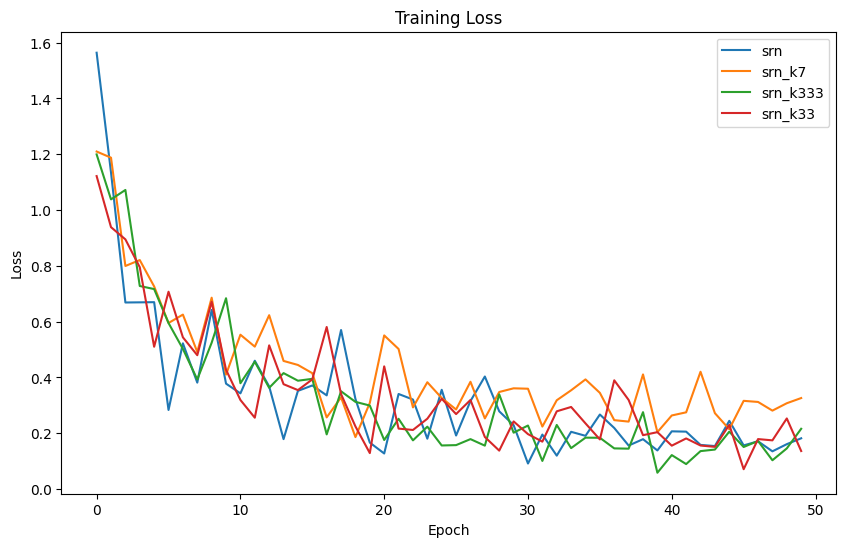

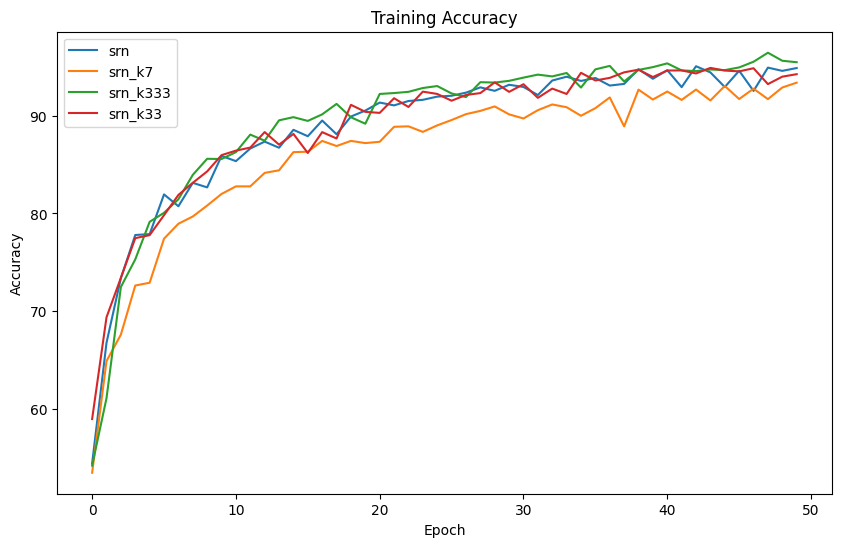

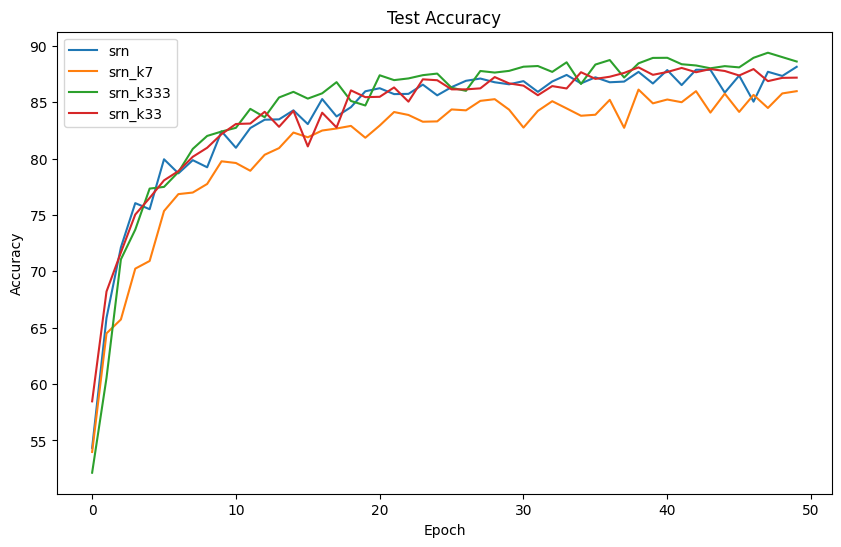

In [5]:
# Plot the losses for each model
plt.figure(figsize=(10, 6))
plt.plot(losses, label='srn')
plt.plot(losses_k7, label='srn_k7')
plt.plot(losses_k333, label='srn_k333')
plt.plot(losses_k33, label='srn_k33')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.savefig('losses.png')

# Plot the training accuracies for each model
plt.figure(figsize=(10, 6))
plt.plot(train_acces, label='srn')
plt.plot(train_acces_k7, label='srn_k7')
plt.plot(train_acces_k333, label='srn_k333')
plt.plot(train_acces_k33, label='srn_k33')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.savefig('train_acces.png')

# Plot the test accuracies for each model
plt.figure(figsize=(10, 6))
plt.plot(test_acces, label='srn')
plt.plot(test_acces_k7, label='srn_k7')
plt.plot(test_acces_k333, label='srn_k333')
plt.plot(test_acces_k33, label='srn_k33')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()
plt.savefig('test_acces.png')